<a href="https://colab.research.google.com/github/plaban1981/POCs/blob/main/PDF_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [54]:
from google.colab import files
files.upload()

Saving GIL_Policy on Disclosure of Material Events_SS.pdf to GIL_Policy on Disclosure of Material Events_SS.pdf
Saving GMR_Dividend_Distribution_Policy.pdf to GMR_Dividend_Distribution_Policy.pdf


{'GIL_Policy on Disclosure of Material Events_SS.pdf': b'%PDF-1.5\r%\xe2\xe3\xcf\xd3\r\n47 0 obj\r<</Linearized 1/L 152111/O 49/E 113189/N 8/T 151723/H [ 502 338]>>\rendobj\r               \r\n65 0 obj\r<</DecodeParms<</Columns 5/Predictor 12>>/Filter/FlateDecode/ID[<13649232B1A5BD04CEA112656E8D750D><72A193DB9A97054F9AF5673C2EF96D78>]/Index[47 36]/Info 46 0 R/Length 98/Prev 151724/Root 48 0 R/Size 83/Type/XRef/W[1 3 1]>>stream\r\nh\xdebbd`\x10``b``\xb6\x00\x91\x0c\x81 \x92\xb1\tD\xb2\x1c\x05\x91L\x05`\xb67X\\\x16,R\x07"Y7\x81H\xee\x16\xb0\xae\x14\x10\xd9\xa0\x04V\x13\n"M$\x80$\xa3\xed4\xb0H"\x88\xcc\xae\x01\x92\xff\x1b\x1710\x01m\xdc\x07\xd6\xc5\xc0H\x13\xf2?\x03\xe3\x91\x8f\x00\x01\x06\x00U\xe4\x0eA\r\nendstream\rendobj\rstartxref\r\n0\r\n%%EOF\r\n        \r\n82 0 obj\r<</Filter/FlateDecode/I 295/L 279/Length 250/S 214>>stream\r\nh\xdeb```f``rg`a`\xe0\x98\xc0 \xc8\x80\x00\x82\x0c\xac@\xc8\xc2\xc0q\x01\xc8\xb9\xf6\x8f\x81\x811\xec\xc0Y\x07\xe7\x02\xa5?\xe2\x0bX\xa6dGK\x1c\xd3\x85)eq\xd

In [55]:
import shutil
shutil.move("/content/GIL_Policy on Disclosure of Material Events_SS.pdf","/content/drive/MyDrive/ZeoanAI_Poc")

'/content/drive/MyDrive/ZeoanAI_Poc/GIL_Policy on Disclosure of Material Events_SS.pdf'

In [56]:
shutil.move("/content/GMR_Dividend_Distribution_Policy.pdf","/content/drive/MyDrive/ZeoanAI_Poc")

'/content/drive/MyDrive/ZeoanAI_Poc/GMR_Dividend_Distribution_Policy.pdf'

## Install PDF miner

In [ ]:
!pip install --quiet pdfminer

     |████████████████████████████████| 4.2 MB 34.5 MB/s 
     |████████████████████████████████| 2.0 MB 57.1 MB/s 


In [ ]:
!pip install --quiet pdfminer.six

     |████████████████████████████████| 5.6 MB 23.4 MB/s 
     |████████████████████████████████| 3.6 MB 60.9 MB/s 


In [ ]:
path = "/content/drive/MyDrive/ZeoanAI_Poc/HR_Policy-GGIAL.pdf"

In [ ]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTChar,LTLine,LAParams
import os
#path=r'/home/somdev/Documents/PDF Pre-Processing/GIL_Policy on Disclosure of Material Events_SS.pdf'

Extract_Data=[]
bold = False
Extract_Headers = []

for page_layout in extract_pages(path):
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for text_line in element:
                for character in text_line:
                    if isinstance(character, LTChar):
                        Font_size=character.size
                        if 'Bold' in character.fontname:
                            bold = True
                        else: 
                            bold = False
            if bold == True:
              Extract_Headers.append(element.get_text())                
            Extract_Data.append([Font_size,bold,(element.get_text())])

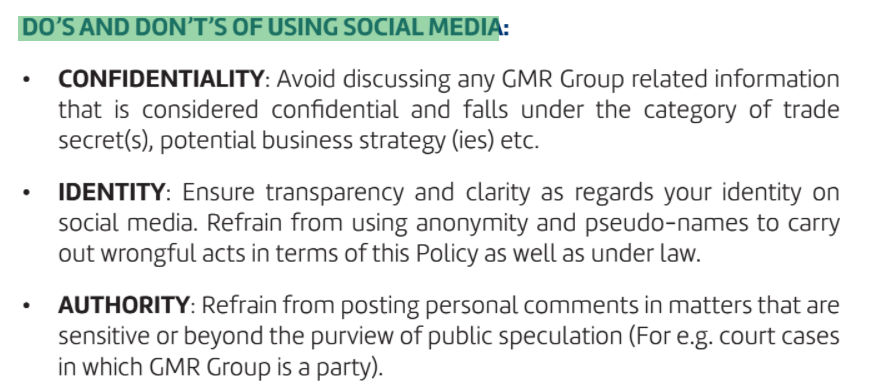

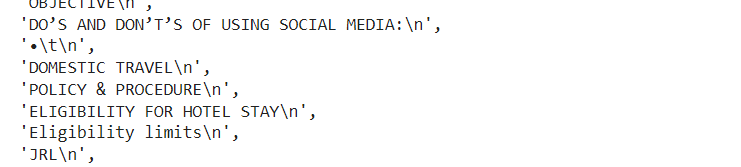

In [ ]:
Extract_Headers

['HR POLICY HANDBOOK\n2017\n',
 'VISION\n',
 'GMR VALUES AND BELIEFS\n',
 'FOREWORD\n',
 'CONTENT\n',
 'CLASSIFICATION OF JOB RESPONSIBILITY LEVEL (JRL)\n',
 'Band\n',
 'Description\n',
 'JRL / \nGrade\n',
 'Band\n',
 'Description\n',
 'JRL / \nGrade\n',
 'CLASSIFICATION OF JOB RESPONSIBILITY LEVEL (JRL)\n',
 'Band\n',
 'Description\n',
 'JRL / \nGrade\n',
 'EMPLOYEE WELFARE \n',
 'FLEXIBLE COMPENSATION & BENEFIT PLAN\n',
 'ELIGIBILITY & APPLICABILITY\n',
 'POLICY & PROCEDURE\n',
 'Fixed Components\n',
 'My Plan (FCBP)\n',
 'Level \n',
 'Petrol Allowance\n',
 'LTA (Per Annum)\n(May choose any one amount)\n',
 'CODE OF BUSINESS CONDUCT & ETHICS (COBCE)\n',
 'APPLICABILITY\n',
 'COBCE covers guidelines of Conduct for the below: \n',
 'GRIEVANCE MANAGEMENT\n',
 'WHISTLE BLOWER \n',
 'POLICY & PROCEDURE\n',
 'SEXUAL HARASSMENT\n',
 'POLICY & PROCEDURE\n',
 'GROOMING & DRESS CODE POLICY\n',
 'ELIGIBILITY & APPLICABILITY:\n',
 'PROCEDURE \n',
 'GMR INFORMATION SECURITY \n',
 'APPLICABILITY\n

In [ ]:
Extract_Data

[[26.5783, True, 'HR POLICY HANDBOOK\n2017\n'],
 [13.0, True, 'VISION\n'],
 [10.0,
  False,
  'GMR Group will be an institution in perpetuity that\nwill build entrepreneurial organizations making a difference \nto society through creation of value.\n'],
 [13.0, True, 'GMR VALUES AND BELIEFS\n'],
 [6.5, False, '1  | Pragyan - Policy Handbook\n'],
 [13.0, True, 'FOREWORD\n'],
 [10.0, False, 'Dear Colleague,\n'],
 [10.0,
  False,
  'It is indeed a privilege to have you as a member of our GMR \nfamily.\n'],
 [10.0,
  False,
  'It gives us immense pleasure to share this booklet containing \nthe essence of our HR Policies.\n'],
 [10.0,
  False,
  '“Pragyan” provides us with an opportunity to learn about our \nvarious HR policies and enhance our understanding of these \npolicies.\n'],
 [10.0,
  False,
  'We are sure that this booklet will make it easy for you to refer \nto these policies instead of relying on memory.\n'],
 [10.0, False, 'Happy reading!!\n'],
 [10.000000000000014, False, 'Anir

In [ ]:
#!/usr/bin/env python
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.layout import LAParams
from pdfminer.converter import PDFPageAggregator
import pdfminer


def createPDFDoc(fpath):
    fp = open(fpath, 'rb')
    parser = PDFParser(fp)
    document = PDFDocument(parser, password='')
    # Check if the document allows text extraction. If not, abort.
    if not document.is_extractable:
        raise "Not extractable"
    else:
        return document


def createDeviceInterpreter():
    rsrcmgr = PDFResourceManager()
    laparams = LAParams()
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    return device, interpreter


def parse_obj(objs):
    for obj in objs:
        if isinstance(obj, pdfminer.layout.LTTextBox):
            for o in obj._objs:
                if isinstance(o,pdfminer.layout.LTTextLine):
                    text=o.get_text()
                    if text.strip():
                        for c in  o._objs:
                            if isinstance(c, pdfminer.layout.LTChar):
                                print ("fontname %s"%c.fontname)
        # if it's a container, recurse
        elif isinstance(obj, pdfminer.layout.LTFigure):
            parse_obj(obj._objs)
        else:
            pass


document=createPDFDoc(path)
device,interpreter=createDeviceInterpreter()
pages=PDFPage.create_pages(document)
interpreter.process_page(pages.next())
layout = device.get_result()


parse_obj(layout._objs)

AttributeError: ignored

## Extracting headers and paragraphs from a PDF using PyMuPDF

##Fitz 


https://towardsdatascience.com/extracting-headers-and-paragraphs-from-pdf-using-pymupdf-676e8421c467

In [2]:
!pip install --quiet fitz

     |████████████████████████████████| 78 kB 4.6 MB/s 
     |████████████████████████████████| 3.2 MB 17.5 MB/s 
     |████████████████████████████████| 421 kB 65.1 MB/s 
     |████████████████████████████████| 482 kB 70.5 MB/s 
     |████████████████████████████████| 130 kB 71.8 MB/s 
     |████████████████████████████████| 5.1 MB 16.4 MB/s 
     |████████████████████████████████| 41 kB 689 kB/s 
     |████████████████████████████████| 6.4 MB 60.2 MB/s 


In [3]:
!pip install --quiet PyMuPDF

     |████████████████████████████████| 8.7 MB 8.0 MB/s 


In [4]:
def fonts(doc, granularity=False):
    """Extracts fonts and their usage in PDF documents.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param granularity: also use 'font', 'flags' and 'color' to discriminate text
    :type granularity: bool
    :rtype: [(font_size, count), (font_size, count}], dict
    :return: most used fonts sorted by count, font style information
    """
    styles = {}
    font_counts = {}

    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # block contains text
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if granularity:
                            identifier = "{0}_{1}_{2}_{3}".format(s['size'], s['flags'], s['font'], s['color'])
                            styles[identifier] = {'size': s['size'], 'flags': s['flags'], 'font': s['font'],
                                                  'color': s['color']}
                        else:
                            identifier = "{0}".format(s['size'])
                            styles[identifier] = {'size': s['size'], 'font': s['font']}

                        font_counts[identifier] = font_counts.get(identifier, 0) + 1  # count the fonts usage

    font_counts = sorted(font_counts.items(), key=itemgetter(1), reverse=True)

    if len(font_counts) < 1:
        raise ValueError("Zero discriminating fonts found!")

    return font_counts, styles

In [5]:
def font_tags(font_counts, styles):
    """Returns dictionary with font sizes as keys and tags as value.
    :param font_counts: (font_size, count) for all fonts occuring in document
    :type font_counts: list
    :param styles: all styles found in the document
    :type styles: dict
    :rtype: dict
    :return: all element tags based on font-sizes
    """
    p_style = styles[font_counts[0][0]]  # get style for most used font by count (paragraph)
    p_size = p_style['size']  # get the paragraph's size

    # sorting the font sizes high to low, so that we can append the right integer to each tag 
    font_sizes = []
    for (font_size, count) in font_counts:
        font_sizes.append(float(font_size))
    font_sizes.sort(reverse=True)

    # aggregating the tags for each font size
    idx = 0
    size_tag = {}
    for size in font_sizes:
        idx += 1
        if size == p_size:
            idx = 0
            size_tag[size] = '<p>'
        if size > p_size:
            size_tag[size] = '<h{0}>'.format(idx)
        elif size < p_size:
            size_tag[size] = '<s{0}>'.format(idx)

    return size_tag

* 

In [6]:
#<header> --> <h>, <paragraph> --> <p> or <subscript> --> <s3>
def headers_para(doc, size_tag):
    """Scrapes headers & paragraphs from PDF and return texts with element tags.
    :param doc: PDF document to iterate through
    :type doc: <class 'fitz.fitz.Document'>
    :param size_tag: textual element tags for each size
    :type size_tag: dict
    :rtype: list
    :return: texts with pre-prended element tags
    """
    header_para = []  # list with headers and paragraphs
    first = True  # boolean operator for first header
    previous_s = {}  # previous span

    for page in doc:
        blocks = page.get_text("dict")["blocks"]
        for b in blocks:  # iterate through the text blocks
            if b['type'] == 0:  # this block contains text

                # REMEMBER: multiple fonts and sizes are possible IN one block

                block_string = ""  # text found in block
                for l in b["lines"]:  # iterate through the text lines
                    for s in l["spans"]:  # iterate through the text spans
                        if s['text'].strip():  # removing whitespaces:
                            if first:
                                previous_s = s
                                first = False
                                block_string = size_tag[s['size']] + s['text']
                            else:
                                if s['size'] == previous_s['size']:

                                    if block_string and all((c == "|") for c in block_string):
                                        # block_string only contains pipes
                                        block_string = size_tag[s['size']] + s['text']
                                    if block_string == "":
                                        # new block has started, so append size tag
                                        block_string = size_tag[s['size']] + s['text']
                                    else:  # in the same block, so concatenate strings
                                        block_string += " " + s['text']

                                else:
                                    header_para.append(block_string)
                                    block_string = size_tag[s['size']] + s['text']

                                previous_s = s

                    # new block started, indicating with a pipe
                    block_string += "|"

                header_para.append(block_string)

    return header_para

In [7]:
import fitz

In [117]:
#path = "/content/drive/MyDrive/ZeoanAI_Poc/HR_Policy-GGIAL.pdf"
path = "/content/drive/MyDrive/ZeoanAI_Poc/PDF/legy108.pdf"
#path = "/content/drive/MyDrive/ZeoanAI_Poc/GIL_Policy on Disclosure of Material Events_SS.pdf"
#path = "/content/drive/MyDrive/ZeoanAI_Poc/GMR_Dividend_Distribution_Policy.pdf"

In [119]:
doc = fitz.open(path)     # or fitz.Document(filename)

In [120]:
from operator import itemgetter

In [121]:
font_counts, styles = fonts(doc, granularity=False)

In [122]:
size_tag = font_tags(font_counts, styles)

In [123]:
size_tag

{8.0: '<s5>',
 9.0: '<s4>',
 9.5: '<s3>',
 10.0: '<s2>',
 10.000356674194336: '<s1>',
 10.5: '<p>',
 12.0: '<h3>',
 14.0: '<h2>',
 21.0: '<h1>'}

In [124]:
header_para = headers_para(doc, size_tag)

In [125]:
header_para

['<h2>Unit-III|',
 '',
 '<h3>Chapter-8|',
 '',
 '<h1>Transport and| Communication|',
 '',
 '<p>Natural resources, economic activities and| markets are rarely found in one place.| Transport, communication and trade establish| links between producing centres and| consuming centres. The system of mass| production and exchange is complex. Each| region produces the items for which it is best| suited. Trade or the exchange of such| commodities relies on transportation and| communication. Likewise, the high living| standards and quality of life depend on efficient| transportation, communications and trade.  In| earlier days, the means of transport and| communication were the same. But today both| have acquired distinct and specialised forms.| Transport provides the network of links and| carriers through which trade takes place.|',
 '',
 '<h3>TRANSPOR| TRANSPOR| TRANSPOR| TRANSPOR| TRANSPORTTTTT|',
 '',
 '<p>Transport is a service or facility for the carriage| of persons and goods from one pla

##Formating Header and Text into separate lists

In [126]:
import numpy as np
header = []
text = []
for items in header_para:
  if items.startswith('<h'):
    header.append(items[items.index(">")+1:].replace("|",""))
    text.append(np.nan)
  elif items.startswith('<p'):
    header.append(np.nan)
    text.append(items[items.index(">")+1:].replace("|",""))
  elif items.startswith('<s'):
    header.append(np.nan)
    text.append(items[items.index(">")+1:].replace("|",""))


In [127]:
len(header),len(text)

(205, 205)

In [128]:
header

['Unit-III',
 'Chapter-8',
 'Transport and Communication',
 nan,
 'TRANSPOR TRANSPOR TRANSPOR TRANSPOR TRANSPORTTTTT',
 nan,
 'What is a Transport Network ?',
 nan,
 'MODES OF TRANSPOR MODES OF TRANSPOR MODES OF TRANSPOR MODES OF TRANSPOR MODES OF TRANSPORTTTTTAAAAATION TION TION TION TION',
 nan,
 nan,
 nan,
 nan,
 'Land Transport',
 nan,
 nan,
 '     Pack Animals',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Roads',
 nan,
 'Think on these lines for a better tomorrow . . .',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Highways',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Border  Roads',
 nan,
 nan,
 'Railways',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Trans–Continental Railways',
 nan,
 'Trans–Siberian Railway',
 nan,
 nan,
 nan,
 nan,
 'Trans–Canadian Railways',
 nan,
 nan,
 nan,
 'The Union and Pacific Railway',
 nan,
 nan,
 nan,
 nan,
 'The Australian Trans–Continental Railway',
 nan,
 'The Orient Express',
 nan,
 nan,
 'WATER  TRANSPORT',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Sea Routes',

In [129]:
text

[nan,
 nan,
 nan,
 'Natural resources, economic activities and markets are rarely found in one place. Transport, communication and trade establish links between producing centres and consuming centres. The system of mass production and exchange is complex. Each region produces the items for which it is best suited. Trade or the exchange of such commodities relies on transportation and communication. Likewise, the high living standards and quality of life depend on efficient transportation, communications and trade.  In earlier days, the means of transport and communication were the same. But today both have acquired distinct and specialised forms. Transport provides the network of links and carriers through which trade takes place.',
 nan,
 'Transport is a service or facility for the carriage of persons and goods from one place to the other using humans, animals and different kinds of vehicles.  Such movements take place over land, water and air.  Roads and railways form part of land t

In [130]:
import pandas as pd
df = pd.DataFrame({"Header":header,'Text': text})
df.head() 

,Header,Text
0,Unit-III,NaN
1,Chapter-8,NaN
2,Transport and Communication,NaN
3,NaN,"Natural resources, economic activities and mar..."
4,TRANSPOR TRANSPOR TRANSPOR TRANSPOR TRANSPORTTTTT,NaN


In [131]:
df.isnull().sum()

Header    174
Text       31
dtype: int64

In [132]:
df['Header'] = df['Header'].ffill()

In [133]:
df.head()

,Header,Text
0,Unit-III,NaN
1,Chapter-8,NaN
2,Transport and Communication,NaN
3,Transport and Communication,"Natural resources, economic activities and mar..."
4,TRANSPOR TRANSPOR TRANSPOR TRANSPOR TRANSPORTTTTT,NaN


In [134]:
header = df['Header'].values.tolist()
text = df['Text'].values.tolist()

In [135]:
header_dict = {}
for h,t in zip(header,text):
  if h != np.nan:
    if h in header_dict.keys():
      t = str(t).replace("\t","")
      header_dict[h] += str(t).replace("nan","")
    else:
      t = str(t).replace("\t","")
      header_dict[h] = str(t).replace("nan","")

In [136]:
header_dict

{'     Pack Animals': 'Horses  are used as a draught animal even in the Western countries.   Dogs  and reindeer  are used in North America, North Europe and Siberia to draw sledges over snow-covered ground.  Mules  are preferred in the mountainous regions; while  camels are used for caravan movement in deserts. In India, bullocks  are used for pulling carts .Fig. 8.2: A horse cart in a village Tefki, in EthiopiaFig. 8.1: Ropeway and Cable cars in AustriaThis means of transport is usually found on steep mountain slopes and mines which are not suitable for building roads.2021-22Transport and Communication67',
 'AIR  TRANSPORT': 'Air transport is the fastest means of transportation, but it is very costly.  Being fast, it is preferred by passengers for long-distance travel. Valuable cargo can be moved rapidly on a world-wide scale.  It is often the only means to reach inaccessible areas. Air transport has brought about a connectivity revolution in the world. The frictions created by mounta